In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sklearn as sk

In [4]:
import scipy

In [5]:
from math import sqrt

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn import svm

In [11]:
from sklearn import tree

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn import metrics

In [15]:
from sklearn import linear_model

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
from sklearn.metrics import r2_score

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from pandas import ExcelWriter

In [21]:
from pandas import ExcelFile 

In [22]:
Newcredit = pd.read_excel('NewCredit.xlsx')

In [23]:
Newcredit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,3913,689,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,2682,3455,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,29239,13559,14948,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,46990,49291,28959,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,8617,35835,19146,2000,36681,10000,9000,689,679,0


In [24]:
Newcredit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,...,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000
mean,14982.023603,160216.635404,1.606264,1.856619,1.552622,35.432774,-0.003599,-0.121336,-0.155252,-0.212217,...,48969.827306,44137.033777,37513.701056,4562.220142,4447.269008,4012.836373,3787.136667,3738.329607,3760.918533,0.225298
std,8659.069238,122687.148947,0.488586,0.784951,0.522152,9.248021,1.123902,1.202323,1.203947,1.179012,...,69035.159571,63472.134297,55878.468897,8552.822858,8533.758023,8213.920741,8336.029787,8186.664707,8529.165085,0.417786
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-14386.000000,-46127.000000,-53007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7483.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,3413.500000,2500.000000,1636.500000,907.000000,780.000000,390.000000,248.000000,199.000000,17.500000,0.000000
50%,14982.000000,130000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,21643.000000,19621.000000,17572.000000,2043.000000,2000.000000,1712.000000,1473.000000,1500.000000,1400.000000,0.000000
75%,22462.000000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,64495.500000,57091.000000,48303.500000,5000.000000,5000.000000,4149.000000,3983.500000,3986.000000,3800.000000,0.000000
max,30000.000000,500000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,626648.000000,689643.000000,587067.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000


In [25]:
Newcredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28895 entries, 0 to 28894
Data columns (total 22 columns):
ID                            28895 non-null int64
LIMIT_BAL                     28895 non-null int64
SEX                           28895 non-null int64
EDUCATION                     28895 non-null int64
MARRIAGE                      28895 non-null int64
AGE                           28895 non-null int64
PAY_0                         28895 non-null int64
PAY_2                         28895 non-null int64
PAY_3                         28895 non-null int64
PAY_4                         28895 non-null int64
PAY_5                         28895 non-null int64
PAY_6                         28895 non-null int64
BILL_AMT1                     28895 non-null int64
BILL_AMT3                     28895 non-null int64
BILL_AMT5                     28895 non-null int64
PAY_AMT1                      28895 non-null int64
PAY_AMT2                      28895 non-null int64
PAY_AMT3                

In [26]:
Newcredit['SEX'] = Newcredit['SEX'].apply(str)

In [27]:
Newcredit['EDUCATION'] = Newcredit['EDUCATION'].apply(str)

In [28]:
Newcredit['MARRIAGE'] = Newcredit['MARRIAGE'].apply(str)

In [29]:
Newcredit['PAY_0'] = Newcredit['PAY_0'].apply(str)

In [30]:
Newcredit['PAY_2'] = Newcredit['PAY_2'].apply(str)

In [31]:
Newcredit['PAY_3'] = Newcredit['PAY_3'].apply(str)

In [32]:
Newcredit['PAY_4'] = Newcredit['PAY_4'].apply(str)

In [33]:
Newcredit['PAY_5'] = Newcredit['PAY_5'].apply(str)

In [34]:
Newcredit['PAY_6'] = Newcredit['PAY_6'].apply(str)

In [35]:
Newcredit['default payment next month'] = Newcredit['default payment next month'].apply(str)

In [36]:
Newcredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28895 entries, 0 to 28894
Data columns (total 22 columns):
ID                            28895 non-null int64
LIMIT_BAL                     28895 non-null int64
SEX                           28895 non-null object
EDUCATION                     28895 non-null object
MARRIAGE                      28895 non-null object
AGE                           28895 non-null int64
PAY_0                         28895 non-null object
PAY_2                         28895 non-null object
PAY_3                         28895 non-null object
PAY_4                         28895 non-null object
PAY_5                         28895 non-null object
PAY_6                         28895 non-null object
BILL_AMT1                     28895 non-null int64
BILL_AMT3                     28895 non-null int64
BILL_AMT5                     28895 non-null int64
PAY_AMT1                      28895 non-null int64
PAY_AMT2                      28895 non-null int64
PAY_AMT3       

In [37]:
Newcredit2 = Newcredit.iloc[:,1:22]

In [38]:
Newcredit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28895 entries, 0 to 28894
Data columns (total 21 columns):
LIMIT_BAL                     28895 non-null int64
SEX                           28895 non-null object
EDUCATION                     28895 non-null object
MARRIAGE                      28895 non-null object
AGE                           28895 non-null int64
PAY_0                         28895 non-null object
PAY_2                         28895 non-null object
PAY_3                         28895 non-null object
PAY_4                         28895 non-null object
PAY_5                         28895 non-null object
PAY_6                         28895 non-null object
BILL_AMT1                     28895 non-null int64
BILL_AMT3                     28895 non-null int64
BILL_AMT5                     28895 non-null int64
PAY_AMT1                      28895 non-null int64
PAY_AMT2                      28895 non-null int64
PAY_AMT3                      28895 non-null int64
PAY_AMT4       

In [39]:
#features
features = Newcredit2.iloc[:,0:20]

In [40]:
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,689,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,2682,3455,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,13559,14948,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,49291,28959,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,35835,19146,2000,36681,10000,9000,689,679


In [41]:
#dependent variable
depVar = Newcredit2['default payment next month']

In [42]:
#Training Set (Feature Space: X Training)
X_train = (features[0:20226])

In [43]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,689,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,2682,3455,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,13559,14948,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,49291,28959,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,35835,19146,2000,36681,10000,9000,689,679


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 20 columns):
LIMIT_BAL    20226 non-null int64
SEX          20226 non-null object
EDUCATION    20226 non-null object
MARRIAGE     20226 non-null object
AGE          20226 non-null int64
PAY_0        20226 non-null object
PAY_2        20226 non-null object
PAY_3        20226 non-null object
PAY_4        20226 non-null object
PAY_5        20226 non-null object
PAY_6        20226 non-null object
BILL_AMT1    20226 non-null int64
BILL_AMT3    20226 non-null int64
BILL_AMT5    20226 non-null int64
PAY_AMT1     20226 non-null int64
PAY_AMT2     20226 non-null int64
PAY_AMT3     20226 non-null int64
PAY_AMT4     20226 non-null int64
PAY_AMT5     20226 non-null int64
PAY_AMT6     20226 non-null int64
dtypes: int64(11), object(9)
memory usage: 3.1+ MB


In [45]:
#Dependent Variable Training Set (y Training)
y_train = depVar[0:20226]

In [46]:
y_train_count = len(y_train.index)

In [47]:
print('The number of observations in the Y training set are:',str(y_train_count))

The number of observations in the Y training set are: 20226


In [48]:
y_train.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: object

In [49]:
#Testing Set (X Testing)
X_test = features[20226:28895]

In [50]:
X_test_count = len(X_test.index)

In [51]:
print('The number of observations in the feature testing set is:',str(X_test_count))

The number of observations in the feature testing set is: 8669


In [52]:
print(X_test.head())

       LIMIT_BAL SEX EDUCATION MARRIAGE  AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  \
20226     360000   1         1        1   34    -2    -2    -2    -2    -2   
20227     210000   1         2        2   42     0     0     0     0     0   
20228      60000   1         3        1   43     0     0     0     0     0   
20229      20000   1         2        3   48     0     0     0     2     0   
20230      50000   1         3        1   45     0    -1    -1     2    -1   

      PAY_6  BILL_AMT1  BILL_AMT3  BILL_AMT5  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
20226    -2       2433        505         -4      1230       505       843   
20227     0     197204     205477     212737      8800      9000      9200   
20228     0      44057      42345      17490      1669      2000      1870   
20229     0      16537      16926      16820      1500      3500      1000   
20230    -1      10522       1305       1073       261      2305         0   

       PAY_AMT4  PAY_AMT5  PAY_AMT6  
20226         4      224

In [53]:
#Ground Truth (y_test) 
y_test = depVar[20226:28895]

In [54]:
y_test_count = len(y_test.index)

In [55]:
print('The number of observations in the Y training set are:',str(y_test_count))

The number of observations in the Y training set are: 8669


In [56]:
y_test.head()

20226    0
20227    0
20228    0
20229    0
20230    1
Name: default payment next month, dtype: object

In [57]:
X_train.shape, X_test.shape

((20226, 20), (8669, 20))

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
sc_x = StandardScaler()

In [60]:
X_train2 = sc_x.fit_transform(X_train)

In [61]:
X_test2 = sc_x.fit_transform(X_test)

In [62]:
clf = tree.DecisionTreeClassifier()

In [63]:
clf_train = clf.fit(X_train, y_train)

In [64]:
clf_train

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [65]:
import graphviz

In [66]:
# Export/Print a decision tree in DOT format.
print(tree.export_graphviz(clf_train, None))

digraph Tree {
node [shape=box] ;
0 [label="X[5] <= 1.5\ngini = 0.357\nsamples = 20226\nvalue = [15530, 4696]"] ;
1 [label="X[6] <= 1.5\ngini = 0.288\nsamples = 17960\nvalue = [14821, 3139]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[15] <= 1500.5\ngini = 0.256\nsamples = 16336\nvalue = [13878, 2458]"] ;
1 -> 2 ;
3 [label="X[11] <= 529.5\ngini = 0.33\nsamples = 6351\nvalue = [5025, 1326]"] ;
2 -> 3 ;
4 [label="X[16] <= 0.5\ngini = 0.394\nsamples = 2051\nvalue = [1497, 554]"] ;
3 -> 4 ;
5 [label="X[0] <= 295000.0\ngini = 0.43\nsamples = 1220\nvalue = [839, 381]"] ;
4 -> 5 ;
6 [label="X[5] <= -1.5\ngini = 0.402\nsamples = 937\nvalue = [676, 261]"] ;
5 -> 6 ;
7 [label="X[13] <= -238.0\ngini = 0.265\nsamples = 248\nvalue = [209, 39]"] ;
6 -> 7 ;
8 [label="X[2] <= 3.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
8 -> 10 ;
11 [labe

In [67]:
# To create our Decision Tree Graph
import pydotplus

In [68]:
# To Display a image of our graph
from IPython.display import Image

In [69]:
from sklearn.tree import export_graphviz

[Text(256.3521066641854, 214.85142857142856, 'X[5] <= 1.5\ngini = 0.357\nsamples = 20226\nvalue = [15530, 4696]'),
 Text(206.36990064399725, 209.6742857142857, 'X[6] <= 1.5\ngini = 0.288\nsamples = 17960\nvalue = [14821, 3139]'),
 Text(137.8440264590208, 204.49714285714285, 'X[15] <= 1500.5\ngini = 0.256\nsamples = 16336\nvalue = [13878, 2458]'),
 Text(70.23156477105982, 199.32, 'X[11] <= 529.5\ngini = 0.33\nsamples = 6351\nvalue = [5025, 1326]'),
 Text(33.87412428594125, 194.14285714285714, 'X[16] <= 0.5\ngini = 0.394\nsamples = 2051\nvalue = [1497, 554]'),
 Text(22.849515810245478, 188.96571428571428, 'X[0] <= 295000.0\ngini = 0.43\nsamples = 1220\nvalue = [839, 381]'),
 Text(10.834267068175613, 183.78857142857143, 'X[5] <= -1.5\ngini = 0.402\nsamples = 937\nvalue = [676, 261]'),
 Text(2.7367462175140562, 178.61142857142858, 'X[13] <= -238.0\ngini = 0.265\nsamples = 248\nvalue = [209, 39]'),
 Text(2.4782196375570087, 173.43428571428572, 'X[15] <= 1126.0\ngini = 0.375\nsamples = 4\nva

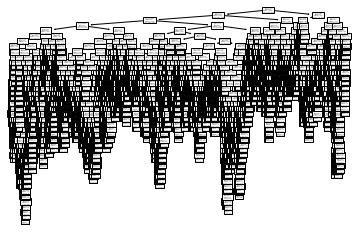

In [70]:
tree.plot_tree(clf.fit(X_train, y_train))

In [71]:
from sklearn.tree.export import export_text

In [72]:
clfsvm = svm.SVC(kernel='rbf')

In [75]:
clfsvm_train = clfsvm.fit(X_train2, y_train)

In [76]:
clfsvm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [77]:
clfgradient = SGDClassifier(loss="hinge", penalty="l2", max_iter=300)

In [78]:
clfgradient_train = clfgradient.fit(X_train, y_train)

In [79]:
clfgradient_train

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=300, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [80]:
clflogistic = LogisticRegression()

In [81]:
clflogistic_train = clflogistic.fit(X_train2, y_train)

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
clflogistic_train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
clfrandomf = RandomForestClassifier(n_estimators=400, max_depth=7, random_state=0)

In [84]:
clfrandomf_train = clfrandomf.fit(X_train, y_train)

In [85]:
clfrandomf_train

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [86]:
#choosing the right model
print(cross_val_score(clf, X_train, y_train)) 

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.70384102 0.71551468 0.71977451]


In [87]:
#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split. 

In [88]:
print(cross_val_score(clfsvm, X_train, y_train)) 

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\tgarita\appdata\local\programs\

[0.76820406 0.76846633 0.76739356]


In [89]:
print(cross_val_score(clfgradient, X_train, y_train))

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.76761086 0.76105013 0.39919893]


In [90]:
print(cross_val_score(clflogistic, X_train, y_train)) 

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.76835237 0.76816968 0.76798695]


In [91]:
print(cross_val_score(clfrandomf, X_train, y_train)) 

c:\users\tgarita\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.8017203  0.80347078 0.82643525]


In [92]:
clf.score(X_train,y_train)

0.9994067042420647

In [93]:
clfsvm.score(X_train,y_train)

0.7678235933946406

In [94]:
clfgradient.score(X_train,y_train)

0.7191733412439434

In [95]:
clflogistic.score(X_train,y_train)

0.7642143775338673

In [96]:
clfrandomf.score(X_train,y_train)

0.8241372490853357

In [97]:
predictions = clf.predict(X_test)

In [98]:
predictions

array(['0', '1', '1', ..., '1', '0', '0'], dtype=object)

In [99]:
predRsquared = r2_score(y_test, predictions)

In [100]:
predRsquared

-0.6020434307441034

In [101]:
y_predictions_count = len(predictions)

In [102]:
y_predictions_count

8669

In [103]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)

In [104]:
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [105]:
# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,5625,1230
Actual Positive,1068,746


In [106]:
5625/6855

0.8205689277899344

In [107]:
746/1814

0.41124586549062847

In [108]:
predictionssvm = clfsvm.predict(X_test)

In [109]:
cmsvm = metrics.confusion_matrix(y_test, predictionssvm)

In [110]:
cmsvm_df = pd.DataFrame(cmsvm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [111]:
cmsvm_df

,Predicted Negative,Predicted Positive
Actual Negative,6855,0
Actual Positive,1814,0


In [112]:
predictionsgradient = clfgradient.predict(X_test)

In [113]:
cmgradient = metrics.confusion_matrix(y_test, predictionsgradient)

In [114]:
cmgradient_df = pd.DataFrame(cmgradient, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [115]:
cmgradient_df

,Predicted Negative,Predicted Positive
Actual Negative,5916,939
Actual Positive,1319,495


In [116]:
5916/6855

0.863019693654267

In [117]:
495/1814

0.272877618522602

In [118]:
predictionslogistic = clflogistic.predict(X_test)

In [119]:
cmlogistic = metrics.confusion_matrix(y_test, predictionslogistic)

In [120]:
cmlogistic_df = pd.DataFrame(cmlogistic, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [121]:
cmlogistic_df

,Predicted Negative,Predicted Positive
Actual Negative,6813,42
Actual Positive,1804,10


In [122]:
6813/6855

0.9938730853391685

In [123]:
10/1814

0.005512679162072767

In [124]:
predictionsrandomf = clfrandomf.predict(X_test)

In [125]:
cmrandomf = metrics.confusion_matrix(y_test, predictionsrandomf)

In [126]:
cmrandomf_df = pd.DataFrame(cmrandomf, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

In [127]:
cmrandomf_df

,Predicted Negative,Predicted Positive
Actual Negative,6614,241
Actual Positive,1205,609


In [128]:
6614/6855

0.9648431801604668

In [129]:
609/1814

0.33572216097023155